In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

## Hallucination Quantification (SelfCheckGPT)

### bert_scorer

In [14]:
precision = 3
path_to_metrics = '/home/prasoon/snap/main/mtp/llm-science-miscommunication/results/metrics/'
metric = 'bert_scorer'
models = ['all-MiniLM-L6-v2', 'all-mpnet-base-v2']
model_info = {}
for model_index in range(2):
    model = models[model_index]
    model_info[model] = {}
    
    for file_index in range(len(os.listdir(path_to_metrics + metric + '/' + model))):
        file = os.listdir(path_to_metrics + metric + '/' + model)[file_index]
        response_model = file[:-4]
        plot_data = []
        with open(path_to_metrics + metric + '/' + model + '/' + file, 'rb') as handle:
            result = pickle.load(handle)
        for main_response_index in range(len(result)):
            plot_data.append(np.mean(result[main_response_index]))
        model_info[model][response_model] = np.array(plot_data)

/home/prasoon/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/prasoon/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


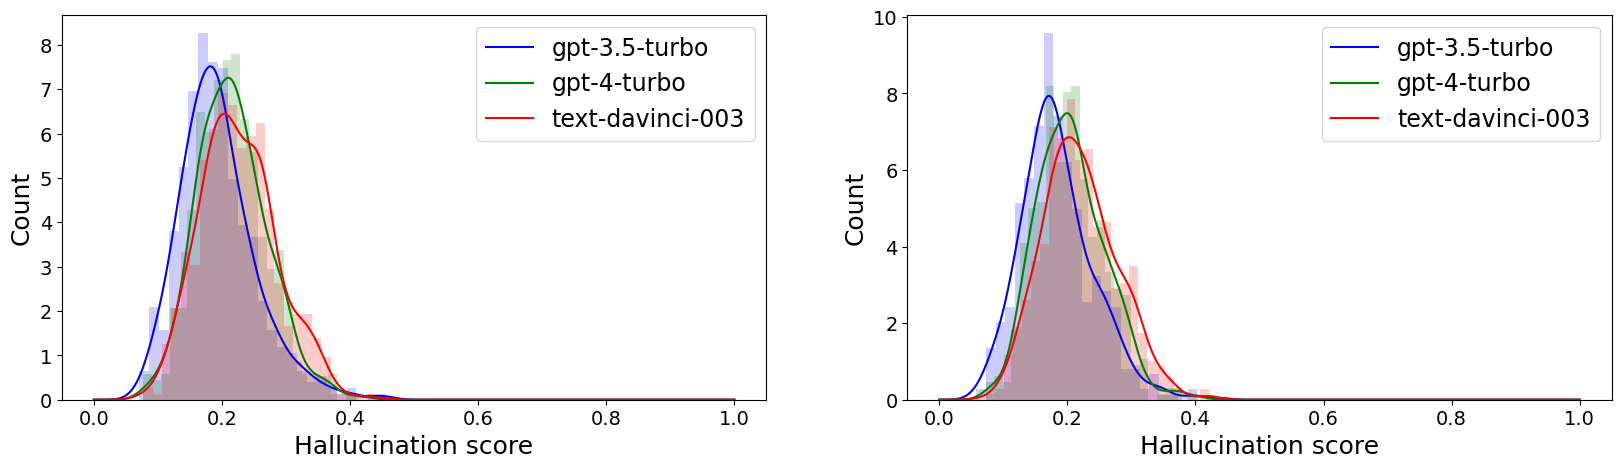

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
values = np.linspace(0, 1, 10)
colors = ['blue', 'green', 'red']
response_models = ['text-davinci-003', 'gpt-4-turbo', 'gpt-3.5-turbo']
# print(response_models)

for model_index in range(2):
    # for each bert model chosen for calculating semantic similarity 
    model = models[model_index]
    non_nan_indices = np.where(~np.isnan(model_info[model][response_models[0]]) & ~np.isnan(model_info[model][response_models[1]]) & ~np.isnan(model_info[model][response_models[2]]))[0]
    
    for file_index in range(len(os.listdir(path_to_metrics + metric + '/' + model))):
        file = os.listdir(path_to_metrics + metric + '/' + model)[file_index]

        response_model = file[:-4]
        plot_data = model_info[model][response_model][non_nan_indices]
        kde = stats.gaussian_kde(plot_data)
        
        ax[model_index].hist(plot_data, color = colors[file_index], density=True, bins=25, alpha=0.2)
        ax[model_index].plot(np.linspace(0, 1, 1000), kde(np.linspace(0, 1, 1000)), c = colors[file_index], label = response_model)
        # ax[model_index].set_title('SelfGPTCheck BertScore with '+ model)
        ax[model_index].legend(fontsize = 17 , bbox_to_anchor=(1, 1))
        ax[model_index].set_xlabel('Hallucination score', fontsize = 18)
        ax[model_index].set_ylabel('Count', fontsize = 18)
        mean = np.mean(plot_data)
        std = np.std(plot_data)
        # print("{:.{}f}".format(mean, precision), "{:.{}f}".format(std, precision))
        
        
        path_to_plots = '/home/prasoon/snap/main/mtp/llm-science-miscommunication/plots/metrics/bert_scorer/'
        extent = ax[model_index].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(path_to_plots + '/' + model + '.pdf', format = 'pdf', bbox_inches=extent.expanded(1.2, 1.3))
        
        
plt.show()


### nli_scorer

In [19]:
precision = 3
path_to_metrics = '/home/prasoon/snap/main/mtp/llm-science-miscommunication/results/metrics/'
metric = 'nli_scorer'
model_info = {}

for file_index in range(len(os.listdir(path_to_metrics + metric + '/'))):
    file = os.listdir(path_to_metrics + metric + '/')[file_index]
    response_model = file[:-4]
    plot_data = []
    with open(path_to_metrics + metric + '/' + file, 'rb') as handle:
            result = pickle.load(handle)
    for main_response_index in range(len(result)):
        plot_data.append(np.mean(result[main_response_index]))
    model_info[response_model] = np.array(plot_data)

/home/prasoon/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/prasoon/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


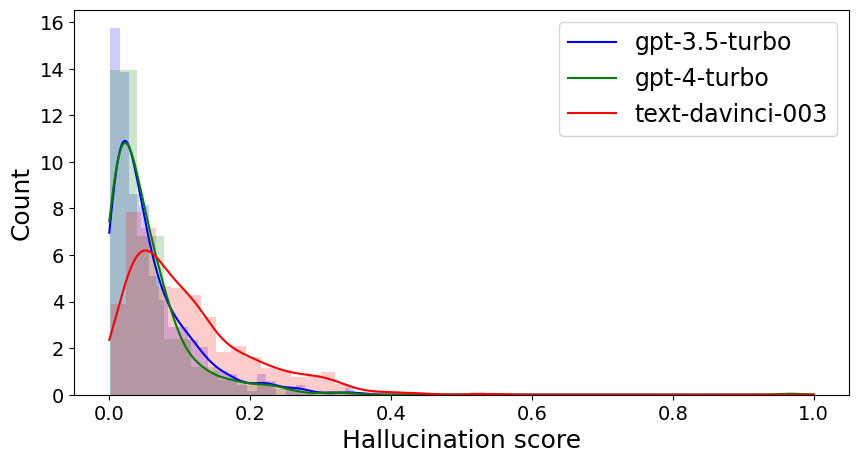

In [21]:
fig, ax = plt.subplots(1, figsize = (10, 5))
ax.tick_params(labelsize=14)
ax.tick_params(labelsize=14)
values = np.linspace(0, 1, 10)
colors = ['blue', 'green', 'red']

response_models = ['text-davinci-003', 'gpt-4-turbo', 'gpt-3.5-turbo']

non_nan_indices = np.where(~np.isnan(model_info[response_models[0]]) & ~np.isnan(model_info[response_models[1]]) & ~np.isnan(model_info[response_models[2]]))[0]
for file_index in range(len(os.listdir(path_to_metrics + metric + '/'))):
    file = os.listdir(path_to_metrics + metric + '/')[file_index]
    response_model = file[:-4]
    plot_data = model_info[response_model][non_nan_indices]
    kde = stats.gaussian_kde(plot_data)
    
    
    ax.hist(plot_data, color = colors[file_index], density=True, bins=25, alpha=0.2)
    ax.plot(np.linspace(0, 1, 1000), kde(np.linspace(0, 1, 1000)), c = colors[file_index], label = response_model)
    # ax.set_title('SelfGPTCheck NLI')
    ax.legend(fontsize = 17)
    ax.set_xlabel('Hallucination score', fontsize = 18)
    ax.set_ylabel('Count', fontsize = 18)
    
    mean = np.mean(plot_data)
    std = np.std(plot_data)
    # print("{:.{}f}".format(mean, precision), "{:.{}f}".format(std, precision))
    
    path_to_plots = '/home/prasoon/snap/main/mtp/llm-science-miscommunication/plots/metrics/nli_scorer/' 
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(path_to_plots + '/fig.pdf', format = 'pdf', bbox_inches=extent.expanded(1.2, 1.3))
    
plt.show()



### prompt_scorer

In [24]:
path_to_metrics = '/home/prasoon/snap/main/mtp/llm-science-miscommunication/results/metrics/'
metric = 'prompt_scorer'
model_info = {}


for file_index in range(len(os.listdir(path_to_metrics + metric + '/'))):
    file = os.listdir(path_to_metrics + metric + '/')[file_index] 
    response_model = file[:-4]
    plot_data = []
    with open(path_to_metrics + metric + '/' + file, 'rb') as handle:
        result = pickle.load(handle)
    for main_response_index in range(len(result)):
        plot_data.append(np.mean(result[main_response_index]))
    model_info[response_model] = np.array(plot_data)

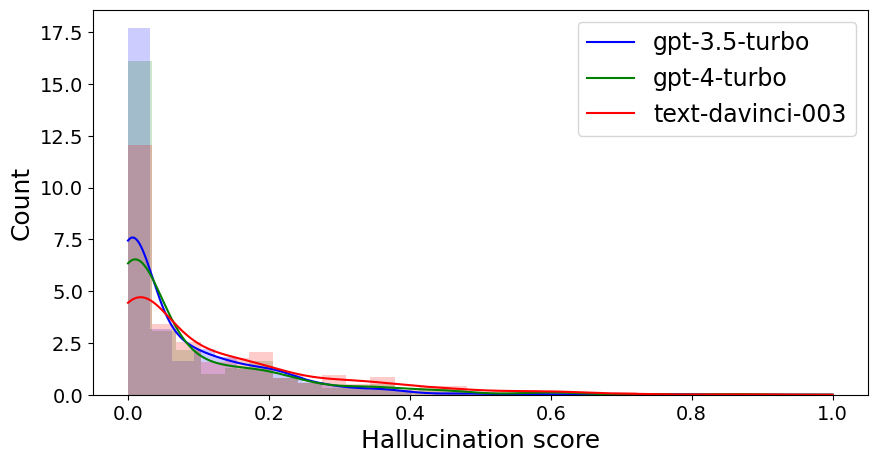

In [29]:
fig, ax = plt.subplots(1, figsize = (10, 5))
ax.tick_params(labelsize=14)
ax.tick_params(labelsize=14)
values = np.linspace(0, 1, 10)
colors = ['blue', 'green', 'red']

response_models = ['text-davinci-003', 'gpt-4-turbo', 'gpt-3.5-turbo']

non_nan_indices = np.where(~np.isnan(model_info[response_models[0]]) & ~np.isnan(model_info[response_models[1]]) & ~np.isnan(model_info[response_models[2]]))[0]
for file_index in range(len(os.listdir(path_to_metrics + metric + '/'))):
    
    file = os.listdir(path_to_metrics + metric + '/')[file_index]
    
    response_model = file[:-4]
    plot_data = model_info[response_model][non_nan_indices]
    kde = stats.gaussian_kde(plot_data)

    ax.hist(plot_data, color = colors[file_index], density=True, bins=25, alpha=0.2)
    ax.plot(np.linspace(0, 1, 1000), kde(np.linspace(0, 1, 1000)), c = colors[file_index], label = response_model)
    ax.legend(fontsize = 17)
    ax.set_xlabel('Hallucination score', fontsize = 18)
    ax.set_ylabel('Count', fontsize =  18)
    
    mean = np.mean(plot_data)
    std = np.std(plot_data)
    
    path_to_plots = '/home/prasoon/snap/main/mtp/llm-science-miscommunication/plots/metrics/prompt_scorer/' 
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(path_to_plots + '/fig.pdf', format = 'pdf', bbox_inches=extent.expanded(1.2, 1.3))
    
plt.show()

